In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
DIR = "C:/rps-photos"

classes = ['rock','paper','scissors']

IMG_SIZE = 70

In [20]:
def prepare_data():
    training_data = []
    for c in classes:
        path = os.path.join(DIR, c)
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                rot_image = cv2.rotate(image_array, cv2.ROTATE_90_CLOCKWISE) 
                new_array = cv2.resize(rot_image, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,c])
            except Exception as e:
                pass
    return training_data

In [21]:
training_data = prepare_data()

In [22]:
print(len(training_data))

2188


In [23]:
import random

random.shuffle(training_data)

In [24]:
class_dict = {'rock':0,
             'paper':1,
             'scissors':2}

In [25]:
x = []
y = []

for feature,label in training_data:
    x.append(feature)
    y.append(class_dict[label])

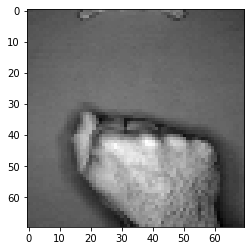

In [41]:
plt.imshow(x[1], cmap='gray')
plt.show()

In [42]:
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [43]:
x = x / 255.0

In [44]:
import pickle

In [45]:
pickle_out = open("x.pickle", 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()
